In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# here not showing null because every null value is represented by zero so first we will change the all the zero with the nan by following process
# df_copy = df.copy(deep = True)
# deep = true meaning , this will be totally independent. Modifications in the copy one does not change anything in the original one.

In [ ]:
# df_copy[['hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']] = df_copy[['hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']].replace(0,np.NaN)

In [ ]:
# df_copy.isnull().sum()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

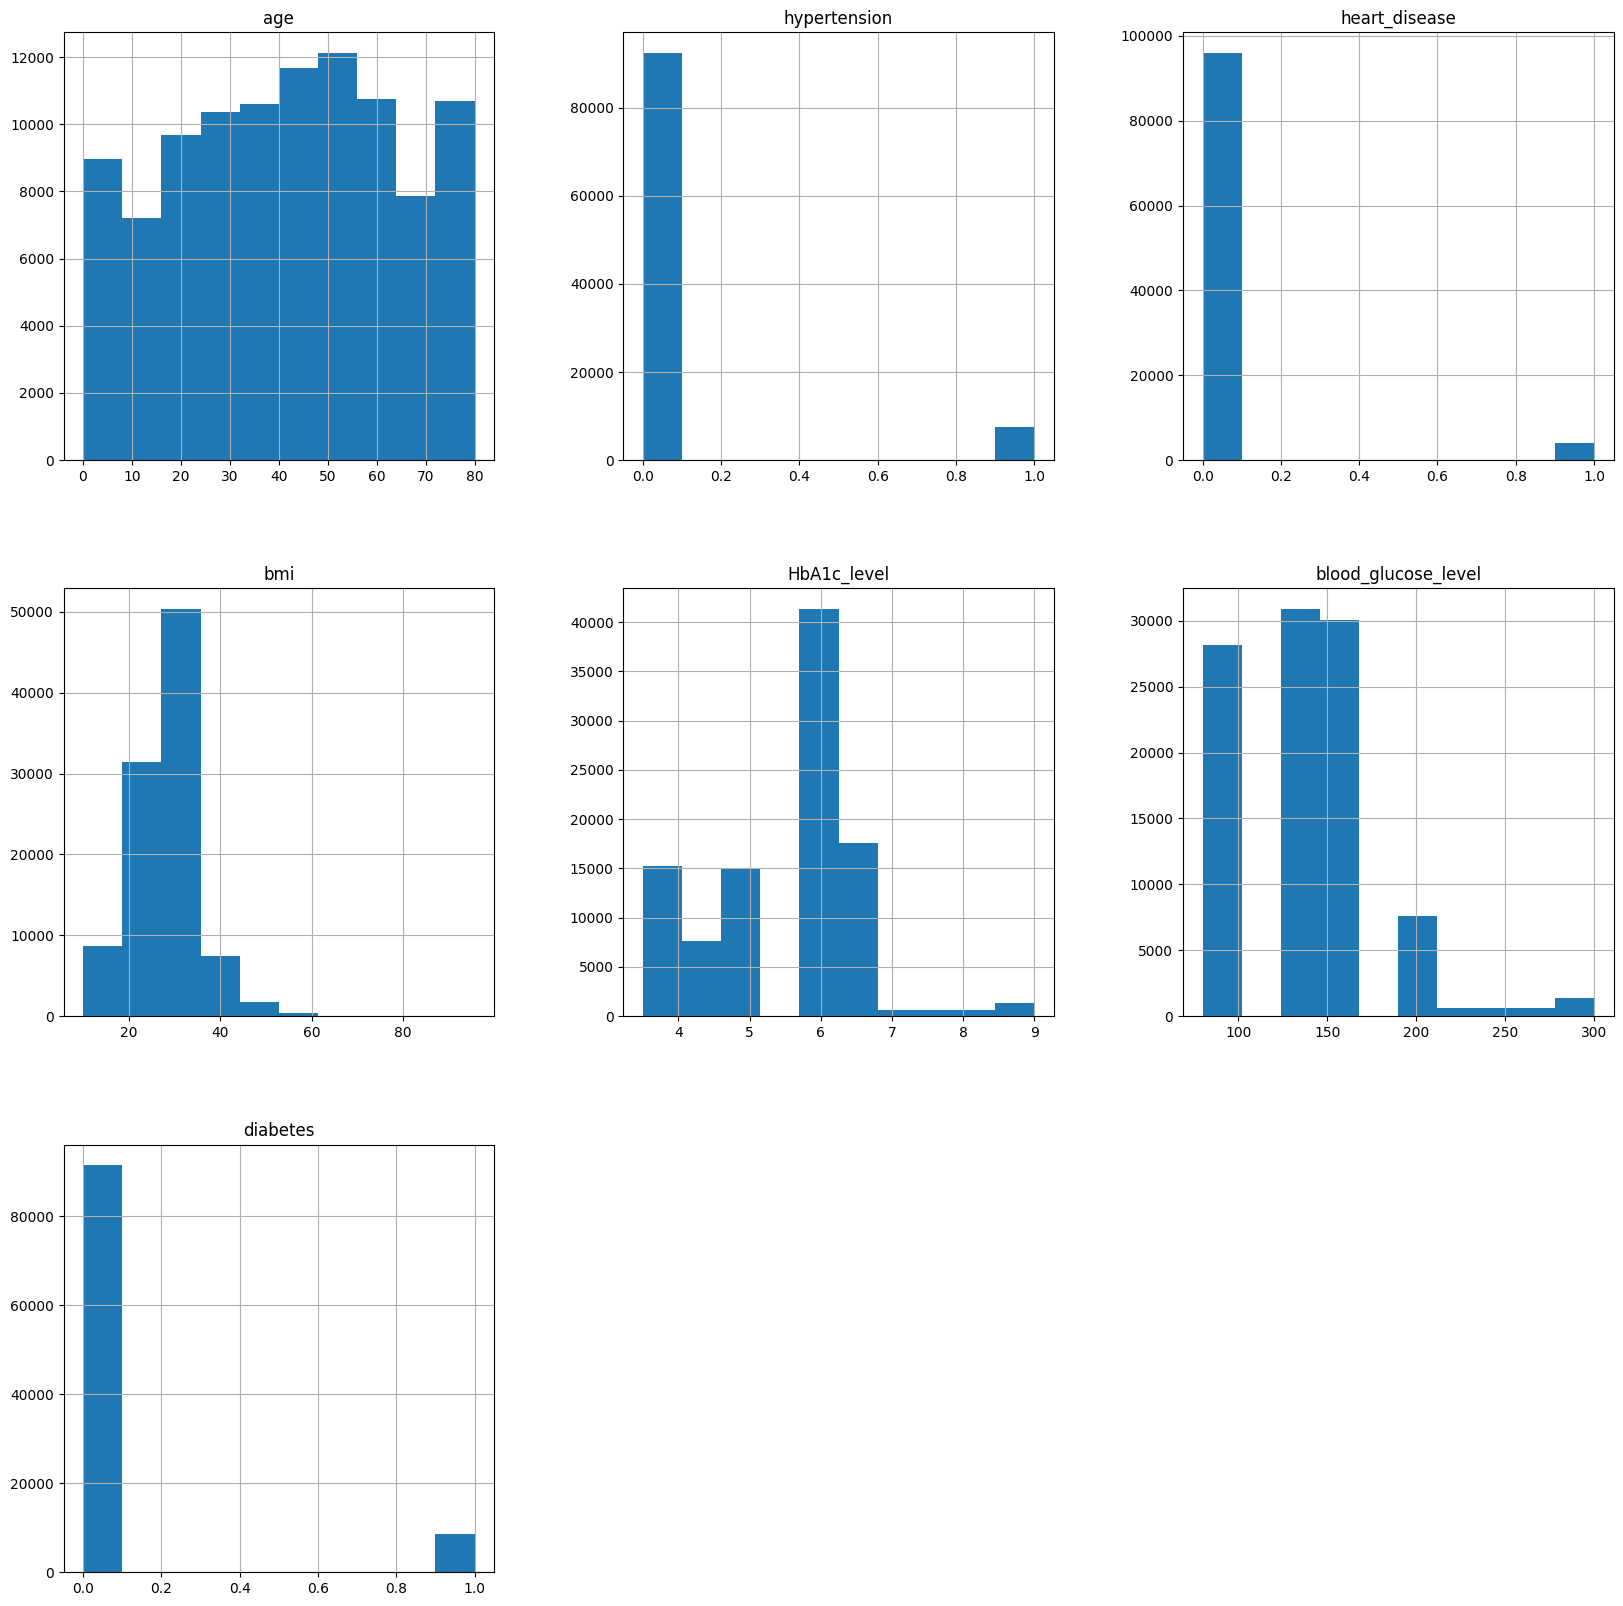

In [ ]:
# p=  df.hist(figsize=(20,20))
df.hist(figsize=(20,20))

In [ ]:
# df_copy.hist(figsize= (20,20))

In [ ]:
# df_copy['hypertension'].fillna(df_copy['hypertension'].median(),inplace = True)
# df_copy['heart_disease'].fillna(df_copy['heart_disease'].median(),inplace = True)
# df_copy.head()

In [ ]:
# well there was no need to do this cause only colums contains null values are hypertension and heartdisease and these
# two columns have only two values 0 and 1.

0    91500
1     8500
Name: diabetes, dtype: int64


<Axes: >

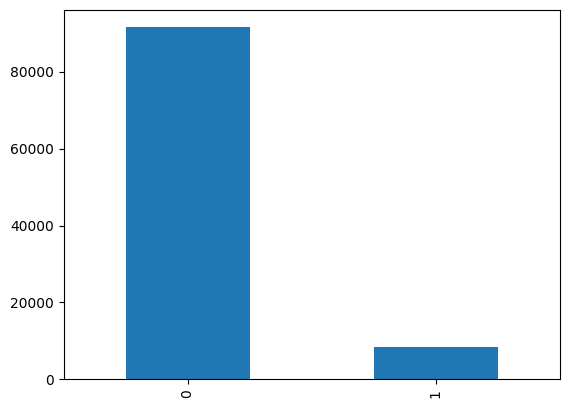

In [ ]:
print(df.diabetes.value_counts())
df.diabetes.value_counts().plot(kind="bar")

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
sc = StandardScaler()

In [ ]:
# we will standardscalise it and make it into a new data frame
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

In [ ]:
X = pd.DataFrame(sc.fit_transform(df.drop(['diabetes'],axis =1),),columns=['gender','age','hypertension','heart_disease','smoking_history',
                                                                          'bmi','HbA1c_level','blood_glucose_level'])

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.841047,1.692704,-0.284439,4.936379,0.963327,-0.321056,1.001706,0.047704
1,-0.841047,0.538006,-0.284439,-0.202578,-1.153468,-0.000116,1.001706,-1.426210
2,1.187234,-0.616691,-0.284439,-0.202578,0.963327,-0.000116,0.161108,0.489878
3,-0.841047,-0.261399,-0.284439,-0.202578,-0.624269,-0.583232,-0.492690,0.416183
4,1.187234,1.515058,3.515687,4.936379,-0.624269,-1.081970,-0.679490,0.416183


In [ ]:
y = df['diabetes']

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [ ]:
y_test.head()

33909    0
92307    0
89107    0
9538     0
31008    0
Name: diabetes, dtype: int64

In [ ]:
# from imblearn.combine import SMOTEENN

# # Create an instance of SMOTEENN
# smote_enn = SMOTEENN()

# # Perform combination sampling on the dataset
# X_resampled, y_resampled = smote_enn.fit_resample(X, y)



In [ ]:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_train = rfc.predict(X_test)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, rfc_train)))

Accuracy_Score = 0.9696969696969697


In [ ]:
from sklearn.svm import SVC
sc = SVC()
sc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = sc.predict(X_test)
print("Accuracy score= ", format(metrics.accuracy_score(y_test,y_pred)))

Accuracy score=  0.9636363636363636
